### Michelle Ide, GitHub mishide
### DataKind project "Broadband Access" Sept 18 2021
#### This notebook imports the Florida data and conducts analysis on the gaps or contradictions using the socio-economic variables in the ACS data to understand why these exist.

In [1]:
# import libraries need for notebook

import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from scipy.stats import t, sem
import seaborn as sns

In [2]:
# import Florida data

ookla = pd.read_csv('../data/ookla_combined_fl.csv')
fcc = pd.read_csv('../data/fcc_477_census_tract_FL.csv')
acs = pd.read_csv('../data/acs_2019_FL.csv')

#### Look at the data

In [3]:
print(ookla.shape, fcc.shape, acs.shape)

(259468, 19) (4205, 8) (4245, 43)


In [4]:
print(ookla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259468 entries, 0 to 259467
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   quadkey     259468 non-null  int64  
 1   avg_d_kbps  259468 non-null  int64  
 2   avg_u_kbps  259468 non-null  int64  
 3   avg_lat_ms  259468 non-null  int64  
 4   tests       259468 non-null  int64  
 5   devices     259468 non-null  int64  
 6   type        259468 non-null  object 
 7   quarter     259468 non-null  object 
 8   year        259468 non-null  int64  
 9   STATEFP     259468 non-null  int64  
 10  COUNTYFP    259468 non-null  int64  
 11  TRACTCE     259468 non-null  int64  
 12  AFFGEOID    259468 non-null  object 
 13  GEOID       259468 non-null  int64  
 14  NAME        259468 non-null  float64
 15  LSAD        259468 non-null  object 
 16  ALAND       259468 non-null  int64  
 17  AWATER      259468 non-null  int64  
 18  tile        259468 non-null  object 
dtypes:

In [5]:
print(fcc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tract       4205 non-null   int64  
 1   max_dn      4205 non-null   float64
 2   max_up      4205 non-null   float64
 3   dn10        4205 non-null   float64
 4   dn100       4205 non-null   float64
 5   dn250       4205 non-null   float64
 6   fiber_100u  4205 non-null   float64
 7   state       4205 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 262.9 KB
None


In [6]:
print(acs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   state                              4245 non-null   int64  
 1   county                             4245 non-null   int64  
 2   tract                              4245 non-null   int64  
 3   geoid                              4245 non-null   int64  
 4   f_broadband                        4245 non-null   float64
 5   f_computer                         4245 non-null   float64
 6   f_ba                               4245 non-null   float64
 7   f_black                            4245 non-null   float64
 8   f_hispanic                         4245 non-null   float64
 9   log_mhi                            4152 non-null   float64
 10  mhi                                4245 non-null   float64
 11  population                         4245 non-null   float

In [7]:
# Look at "unique" value count

print("ookla unique values\n\n",ookla.nunique(),
      "acs unique values\n\n", acs.nunique(), 
      "fcc unique values\n\n", fcc.nunique())

ookla unique values

 quadkey       111010
avg_d_kbps    168418
avg_u_kbps     76386
avg_lat_ms       952
tests            518
devices          190
type               2
quarter            2
year               1
STATEFP            1
COUNTYFP          67
TRACTCE         2928
AFFGEOID        4116
GEOID           4116
NAME            2928
LSAD               1
ALAND           4108
AWATER          3392
tile          111010
dtype: int64 acs unique values

 state                                   1
county                                 67
tract                                2983
geoid                                4245
f_broadband                           528
f_computer                            350
f_ba                                  697
f_black                               712
f_hispanic                            802
log_mhi                               249
mhi                                  3896
population                           3250
households                           2236


In [8]:
ookla.describe()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,ALAND,AWATER
count,2.594680e+05,2.594680e+05,259468.000000,259468.000000,259468.000000,259468.000000,259468.0,259468.0,259468.000000,259468.000000,2.594680e+05,259468.000000,2.594680e+05,2.594680e+05
mean,3.202157e+14,1.218604e+05,30833.858846,37.342582,14.829046,4.990334,2021.0,12.0,71.573751,110179.123595,1.207168e+10,1101.791236,8.924956e+07,7.218847e+06
std,9.149079e+09,1.069764e+05,51367.888694,83.009011,31.340387,7.793005,0.0,0.0,36.747199,256446.779651,3.677206e+07,2564.467797,2.499568e+08,2.575006e+07
min,3.202001e+14,1.000000e+00,1.000000,0.000000,1.000000,1.000000,2021.0,12.0,1.000000,100.000000,1.200100e+10,1.000000,0.000000e+00,0.000000e+00
25%,3.202121e+14,3.424800e+04,5932.000000,14.000000,2.000000,1.000000,2021.0,12.0,35.000000,9034.000000,1.203506e+10,90.340000,4.502204e+06,9.037300e+04
50%,3.202123e+14,9.801750e+04,14101.000000,21.000000,5.000000,2.000000,2021.0,12.0,83.000000,17105.000000,1.208300e+10,171.050000,1.288873e+07,6.214370e+05
75%,3.202132e+14,1.869692e+05,26856.000000,34.000000,15.000000,6.000000,2021.0,12.0,101.000000,50301.000000,1.210103e+10,503.010000,5.899444e+07,4.240122e+06
max,3.202313e+14,2.741351e+06,878573.000000,3593.000000,2816.000000,604.000000,2021.0,12.0,133.000000,990200.000000,1.213397e+10,9902.000000,2.841268e+09,1.874178e+09


#### Merge the dataframes together on GEOID

In [9]:
# rename 'tract' in fcc prior to merge, just to avoid the redundant column post merge
fcc = fcc.rename(columns = {'tract':'GEOID'})
acs = acs.rename(columns = {'geoid':'GEOID'})

In [10]:
from functools import reduce
dfs = [fcc, ookla, acs]
dfAll = reduce(lambda left,right: pd.merge(left,right,how='outer'), dfs)

<AxesSubplot:>

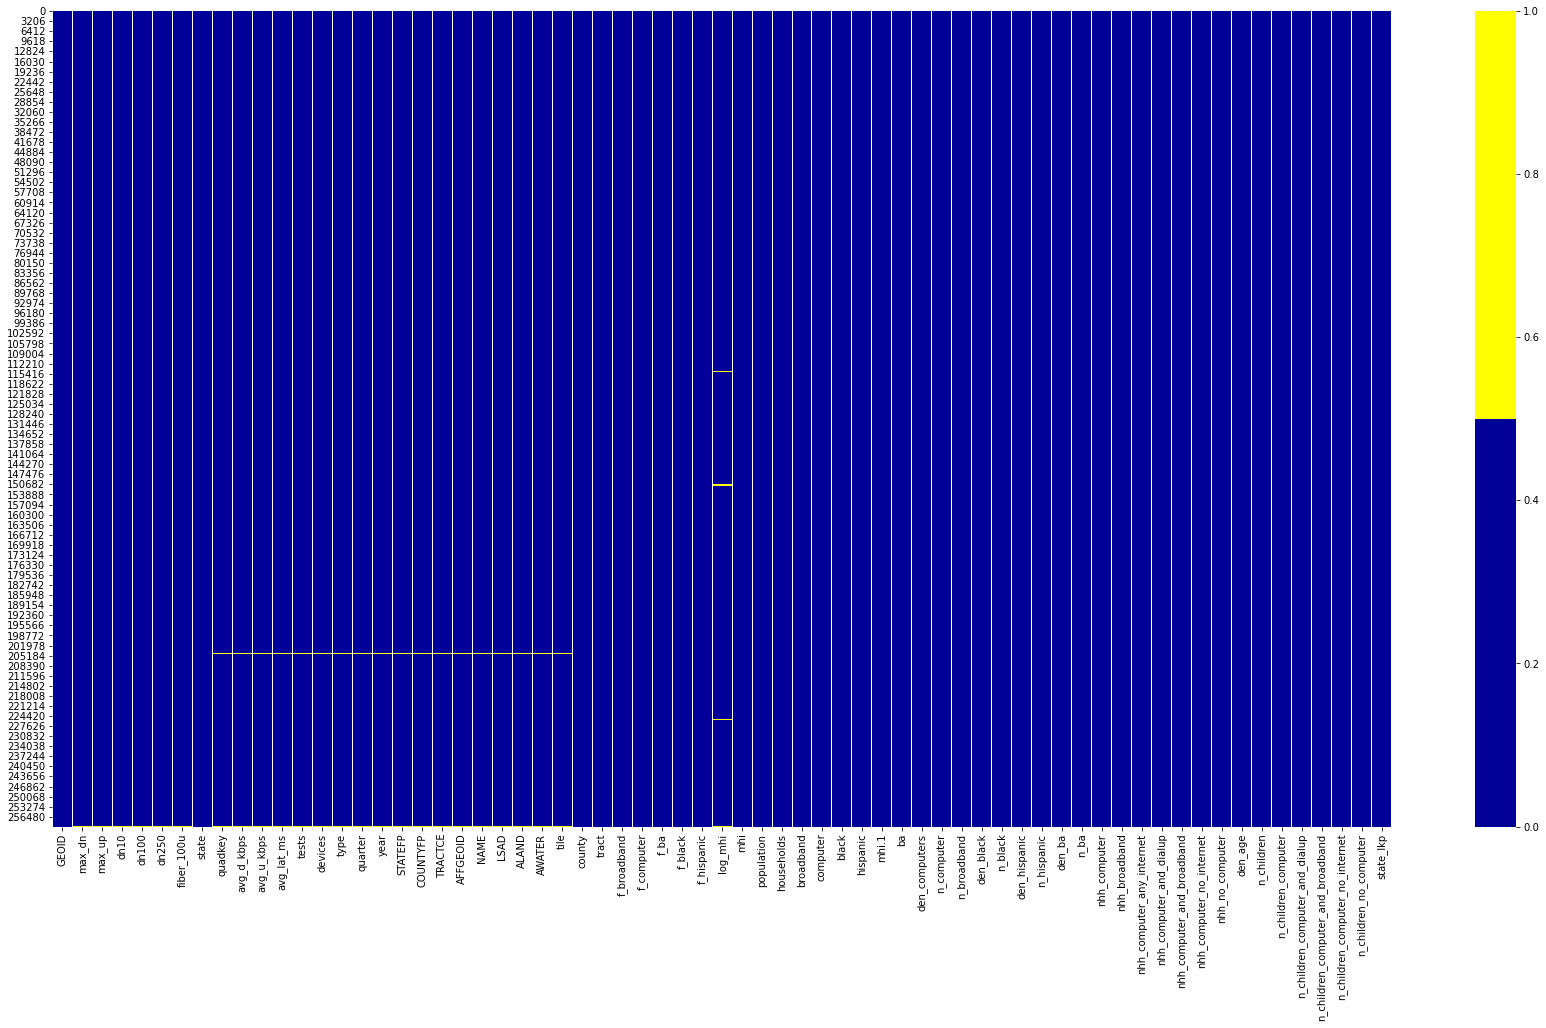

In [14]:
# visualize the missing values; nulls
cols = dfAll.columns[:67]
colours = ['#000099', '#ffff00' ]
plt.figure(figsize=(30,15))
sns.heatmap(dfAll[cols].isnull(), cmap=sns.color_palette(colours))

Nulls:  above, in the heatmap, we seen nulls in yellow, most in the log_mhi
Let's see what the percentage of missing values are:

In [16]:
for col in dfAll.columns:
    pct_missing = np.mean(dfAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

GEOID - 0%
max_dn - 0%
max_up - 0%
dn10 - 0%
dn100 - 0%
dn250 - 0%
fiber_100u - 0%
state - 0%
quadkey - 0%
avg_d_kbps - 0%
avg_u_kbps - 0%
avg_lat_ms - 0%
tests - 0%
devices - 0%
type - 0%
quarter - 0%
year - 0%
STATEFP - 0%
COUNTYFP - 0%
TRACTCE - 0%
AFFGEOID - 0%
NAME - 0%
LSAD - 0%
ALAND - 0%
AWATER - 0%
tile - 0%
county - 0%
tract - 0%
f_broadband - 0%
f_computer - 0%
f_ba - 0%
f_black - 0%
f_hispanic - 0%
log_mhi - 1%
mhi - 0%
population - 0%
households - 0%
broadband - 0%
computer - 0%
black - 0%
hispanic - 0%
mhi.1 - 0%
ba - 0%
den_computers - 0%
n_computer - 0%
n_broadband - 0%
den_black - 0%
n_black - 0%
den_hispanic - 0%
n_hispanic - 0%
den_ba - 0%
n_ba - 0%
nhh_computer - 0%
nhh_broadband - 0%
nhh_computer_any_internet - 0%
nhh_computer_and_dialup - 0%
nhh_computer_and_broadband - 0%
nhh_computer_no_internet - 0%
nhh_no_computer - 0%
den_age - 0%
n_children - 0%
n_children_computer - 0%
n_children_computer_and_dialup - 0%
n_children_computer_and_broadband - 0%
n_children_com

#### Quick correlation map gives an idea of what features we may want to look a first

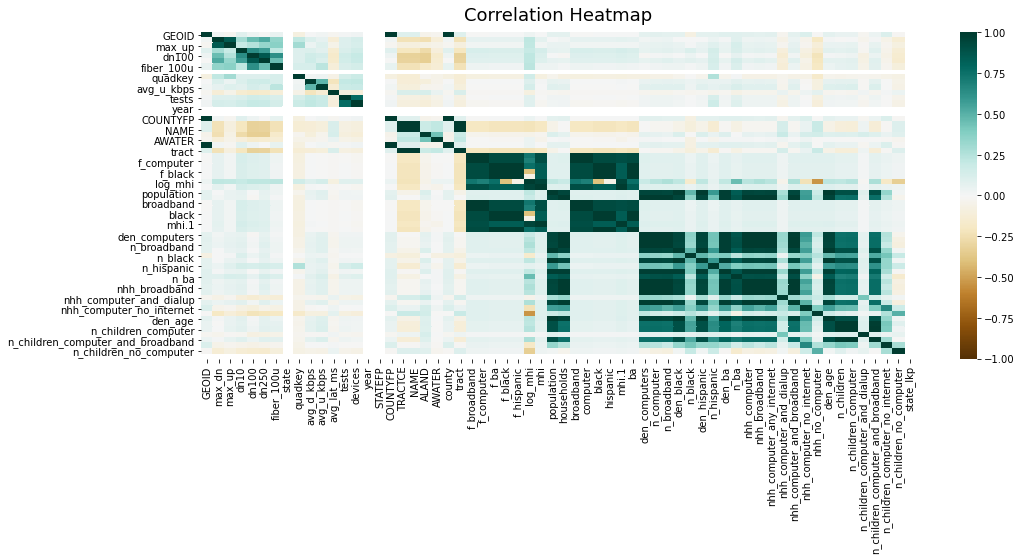

In [17]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfAll.corr(), vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In the heatmaps we see a correlation between race correlated with number of computers, possibly some other associations between devices and population and race.  Let's slice out a few ideas and explore.

In [24]:
dfAll.f_broadband

0               0.816
1               0.816
2               0.816
3               0.816
4               0.816
             ...     
259603   -6666666.660
259604   -6666666.660
259605   -6666666.660
259606   -6666666.660
259607   -6666666.660
Name: f_broadband, Length: 259608, dtype: float64

In [25]:
dfAll.corr()[['f_broadband']].sort_values(by='f_broadband', ascending=False)

,f_broadband
f_computer,1.000000
computer,1.000000
f_broadband,1.000000
broadband,1.000000
ba,0.923300
...,...
tract,-0.205736
state,NaN
year,NaN
STATEFP,NaN


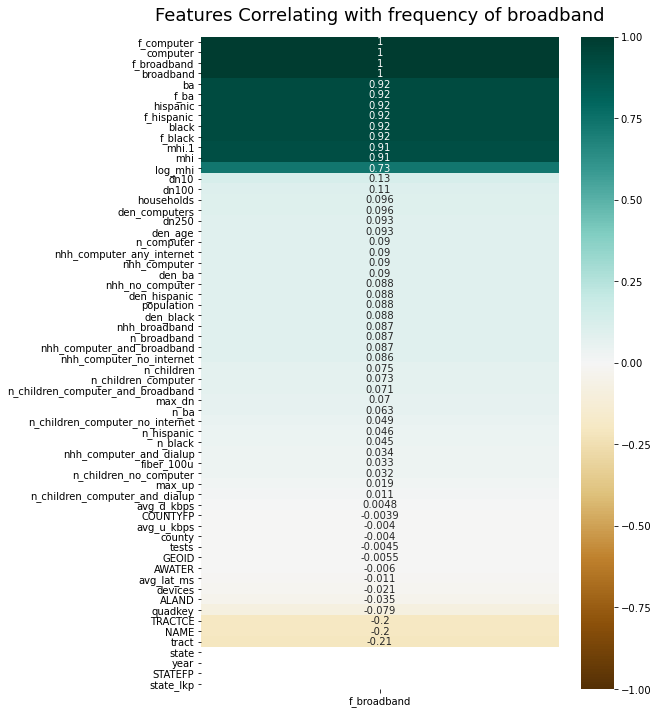

In [27]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dfAll.corr()[['f_broadband']].sort_values(by='f_broadband', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with frequency of broadband', fontdict={'fontsize':18}, pad=16);

We see correlations DO exist between race and broadband frequency.  Also, as expected, there are negative correlations within 'tract' and 'quadkey' since this is a known issue between these two data sets.

In [ ]:
geo_df = df_final[['GEOID','f_black','f_hispanic','f_ba']]
tract_df = df_final[['TRACTCE','f_black','f_hispanic','f_ba']]

In [ ]:
geo_df = geo_df.drop_duplicates()

In [ ]:
geo_df.head()

#### Note: there were negatives in the f_black column that were removed below

In [13]:
geo_df = geo_df.loc[(geo_df.f_black>0)]
geo_df = geo_df.loc[(geo_df.f_hispanic>0)]

NameError: name 'geo_df' is not defined

#### This gives us hispanic and black desities by geoid (location), the remaining percentage are simiply non-hispanic/black.  Plotting these comparisons show back and hispanic population is highly dense in specific locations.  Next step would be to compare these densities to access and speed.

In [ ]:
geo_df['remaining'] = 1-(geo_df.f_black + geo_df.f_hispanic)
geo_df

In [ ]:
# Use 'seaborn' to plot by race as available in the data

# stop deprecated warnings
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


sns.distplot( geo_df.f_black, color='skyblue', label='black')
sns.distplot( geo_df.f_hispanic, color='gold', label='hispanic')
sns.distplot( geo_df.remaining, color = 'green', label='other')
plt.legend()
plt.show()